## Hypothesis to Actor Critic.

## Writing your very own linear regression from scratch

We'll if you're interested in machine learning and datascience, you've no doubt, seen linear regression before. You've probably even used it as well. It's a great first model to throw at a problem and quickly see which features have the biggest impact, it's relatively quick to train, observable and easy to understand. Have you built one yourself though? Going through the actual process in code can solidify some core machine learning concepts, such as a loss function, optimization, gradients, and gradient descent. These remain useful when you get to more complex models, such as Neural Networks, but it can be much easier to gain a deep understanding of the concept in this simpler setting.  
  
For some of us, it's just way easier to see the code.

#### Concepts
- Linear Regression
    - hypothesis
    - loss function
    - gradient descent (optimization)
    - Univariate
    - Multivariate - LinAlg
- Additional Considerations
    - Early Stopping
    - Multiple starts
    
- Logistic Regression (Linear classification)
    - Sigmoid function
    - Multiclass classification
    
- Neural Network
    - A matrix for each layer

- Policy Gradients (Reinforcement Learning) -  Agents framework!
    - Linear
    - Deep policy gradients
- Q Learning
- Actor Critic



#### Dependencies
* Pandas {we'll only use pandas to make reading in and selecting data easier}
* Numpy {we'll be using numpy for row and matrix computations}

#### Key Words
* gradient descent
* model
* hypothesis
* cost function / objective function / loss function

#### Intuition
We're going to start with a random guess of what we think a good model is. We're going to tweak our hypothesis little by little, trying to improve it at each step, 

#### repeat until convergence
for each theta, theta := alpha*delta(theta)

Let's get a dataset to build off of:  
[UCI Housing Data Set](`https://archive.ics.uci.edu/ml/datasets/Housing`)

In [93]:
import pandas as pd
column_names = [
    "crime", # per capita crime rate by town
    "zoned", # proportion of residential land zoned for lots over 25,000 sq.ft.
    "industry", # proportion of non-retail business acres per town
    "charles_river", # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "nox", # nitric oxides concentration (parts per 10 million)
    "rooms", # average number of rooms per dwelling
    "percent_old_units", # proportion of owner-occupied units built prior to 1940
    "employment_distance", # weighted distances to five Boston employment centres
    "highway_distance", # index of accessibility to radial highways
    "tax", # full-value property-tax rate per $10,000
    "teachers", # pupil-teacher ratio by town
    "demographics", # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "econ_status", # % lower status of the population
    "value" # Median value of owner-occupied homes in $1000's    
]
housing = pd.read_csv('./housing.txt', sep="\s+", names=column_names)

## Univariate Linear Regression (One Variable)

Let's take two columns from our dataset to frame the problem we want to solve. We want to see if we can predict the value from a home from the number of rooms it has.

In [124]:
# Okay, let's see if we can predict how much a house will be worth based on the number of rooms it has.
housing[["rooms", "value"]]

,rooms,value
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
5,6.430,28.7
6,6.012,22.9
7,6.172,27.1
8,5.631,16.5
9,6.004,18.9


### It all starts with a hypothesis / Take a first guess / In gradient descent, you have to start somewhere

(Optimization methods)  
We have to start somewhere, so we're just going to take a first guess at our model. Then we'll evaluate it, and take the gradient of our loss function. This will show us the direction we should nudge our values to decrease the output of our loss function. We'll follow this nudge value until we can't improve it anymore.

We're going to randomly choose THETAS then iteratively improve it with gradient descent

In [174]:
import numpy as np
import matplotlib.pyplot as plt

alpha = .01
thetas = np.random.rand(2)*200 # Our initial hypothesis
thetas

array([ 183.70304749,   80.36239076])

Ok so with one variable its easy, we just multilpy the datapoint by theta 1

In [96]:
def predict(thetas, xs):
    return xs * thetas[1] + thetas[0]

In [80]:
predictions = predict(thetas, housing["rooms"])

In [97]:
from numpy import subtract, square, mean, multiply
def loss(predictions, actual):
    return mean(square(subtract(predictions, actual)))
    
loss(predictions, housing["value"])

437.62496028502221

OK now lets implement **batch** gradient descent. This means we compute the gradients using **all** of our training examples. We're just going to hardcode for the univariate case and worry about extending it later.

[ 4.87795878  2.88487178]
62.8713278548
[ 3.93821306  3.03260457]
61.966391663
[ 3.02079741  3.17682696]
61.1039503613
[ 2.1251812   3.31762237]
60.2820084325
[ 1.25084646  3.45507222]
59.498664067
[ 0.39728748  3.58925602]
58.7521047621
[-0.43598938  3.72025137]
58.0406031286
[-1.24946609  3.84813403]
57.3625128935
[-2.04361312  3.97297797]
56.7162650914
[-2.81888977  4.09485539]
56.1003644337
[-3.57574446  4.21383678]
55.5133858492
[-4.31461491  4.32999096]
54.9539711864
[-5.03592846  4.44338511]
54.4208260715
[-5.7401023   4.55408481]
53.912716913
[-6.4275437   4.66215408]
53.4284680477
[-7.09865024  4.76765543]
52.9669590203
[-7.75381009  4.87064988]
52.5271219909
[-8.39340215  4.971197  ]
52.1079392644
[-9.01779635  5.06935493]
51.7084409356
[-9.62735381  5.16518045]
51.3277026451
[-10.22242709   5.25872899]
50.9648434403
[-10.80336035   5.35005464]
50.6190237375
[-11.37048958   5.43921023]
50.2894433788
[-11.9241428    5.52624733]
49.9753397811
[-12.46464022   5.61121626]
49.6759

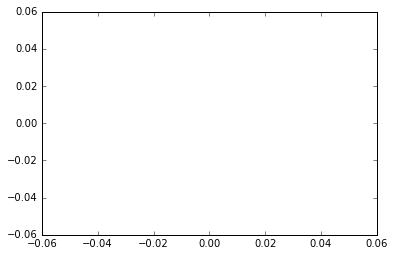

In [165]:
def compute_gradient(thetas, xs, ys):
    predictions = predict(thetas, xs)
    grad0 = mean(subtract(predictions, ys))
    grad1 = mean(multiply(subtract(predictions, ys), xs))
    return np.array([grad0, grad1])

# lets make our gradient descent loop
for ii in range(100000):
    if ii % 200 == 0: 
        print(thetas)
        print(loss(predict(thetas, housing["rooms"]), housing["value"]))
        plt.plot()
    thetas = thetas - (alpha * compute_gradient(thetas, housing['rooms'], housing['value']))

Let's see what it looks like?

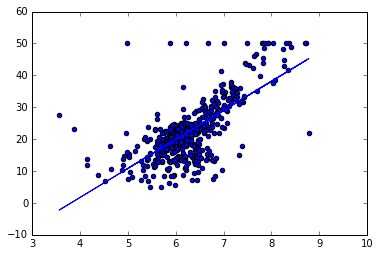

In [168]:
plt.plot(housing["rooms"], thetas[1]*housing["rooms"] + thetas[0])
plt.scatter(housing["rooms"], housing["value"])

And let's see how it compares to the real deal?

In [170]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing[["rooms"]], housing["value"])
print("sklearn learned (intercept, slope): ", lr.intercept_, lr.coef_[0])
print("we learned (intercept, slope): ", thetas[0], thetas[1])

sklearn learned (intercept, slope):  -34.6706207764 9.10210898118
we learned (intercept, slope):  -34.6703836237 9.10207169957


Pretty dang close!

## Multivariate Linear Regression

What if we want to use an additional column from our dataset. Let's try crime and see if it can improve our accuracy. Before, we were hardcording our handling the parameter corresponding to rooms, let's upgrade our algorithm to use matrix multiplication to compute all our params at once

In [176]:
# What do we got?
housing[["rooms", "crime", "value"]].head()

,rooms,crime,value
0,6.575,0.00632,24.0
1,6.421,0.02731,21.6
2,7.185,0.02729,34.7
3,6.998,0.03237,33.4
4,7.147,0.06905,36.2


### What do we have to change?
- add another theta. In fact, let's generate our thetas directly from the number of feature columns
- adjust predict to accomodate more features
- upgrade gradient method to take an arbitrary number of thetas

### Fancy new thetas

In [178]:
ins = housing[["rooms", "crime"]]
n_columns = ins.shape[1]
thetas = np.random.rand(n_columns + 1) # +! for the intercept

### New Predict method

In [183]:
# 1X5 * 5X1 = 1X1
# NX2 * 2X1 = NX1

def predict(thetas: np.array, xs: np.matrix) -> np.array:  
    return thetas[0] + np.dot(xs, thetas[1:]) # see matrix multiplication and numpy.dot

predict(thetas, ins).shape

(506,)

### New Gradient Method

In [223]:
# so we have N predictions and T thetas. We want to compute T gradients.
# NX1 * NXT -> if we transpose we get
# 1XN * NXT -> 1XT

def compute_gradient(thetas: np.array, xs: np.matrix, ys: np.array):
    predictions = predict(thetas, xs)
    error = subtract(predictions, ys)
    grad0 = mean(error)
    n_rows = xs.shape[0]
    other_grads = np.dot(error.T, xs) / n_rows
    return np.append([grad0], other_grads) # Make sure these are in the right order.
    # DO I need to divide by N rows?

compute_gradient(thetas, housing[['rooms', 'crime']], housing['value'])

array([ 0.13638323, -0.02119657, -0.00045447])

Let's try running this bad boy!  
First, let's take a look at what our data looks like now.

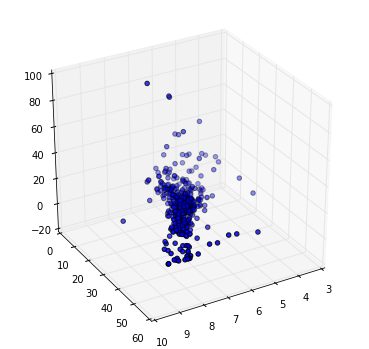

In [236]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(housing["rooms"], housing["value"], housing["crime"])
ax.view_init(elev=30., azim=60)
# def rotate_graph(ii):
#     ax.view_init(elev=10., azim=ii)
#     return (ax,)
#     savefig("movie%d.png" % ii)
# anim = animation.FuncAnimation(fig,rotate_graph,frames=500,interval=20,blit=True)
# anim.to_html5_video()

In [231]:
ins = housing[["rooms", "crime"]]
n_columns = ins.shape[1]
thetas = np.random.rand(n_columns + 1)

for ii in range(100000):
    if ii % 500 == 0:
        print(thetas, loss(predict(thetas, housing[["rooms", "crime"]]), housing["value"]))
    thetas -= (alpha*compute_gradient(thetas, housing[['rooms', 'crime']], housing['value']))

[ 0.00249144  0.3615419   0.13635956] 481.51654121
[-1.09290819  4.01573771 -0.35872418] 47.7632916315
[-2.62696854  4.25416006 -0.35361219] 46.7990084244
[-4.07743423  4.47959021 -0.34877877] 45.9369541046
[-5.44886054  4.69273611 -0.34420874] 45.166290834
[-6.7455545   4.89426719 -0.33988773] 44.4773297522
[-7.97158847  5.08481634 -0.33580219] 43.8614091675
[-9.13081288  5.26498201 -0.33193928] 43.3107856611
[-10.22686834   5.43533002  -0.32828687] 42.818536736
[-11.26319709   5.59639535  -0.32483349] 42.3784737865
[-12.24305378   5.74868384  -0.32156829] 41.9850642946
[-13.1695157    5.89267377  -0.31848102] 41.6333622744
[-14.04549247   6.02881733  -0.31556198] 41.3189460909
[-14.87373515   6.1575421   -0.31280201] 41.0378628706
[-15.65684488   6.27925235  -0.31019244] 40.7865788054
[-16.39728106   6.39433031  -0.30772506] 40.5619347255
[-17.09736908   6.50313739  -0.30539214] 40.3611063816
[-17.75930761   6.60601532  -0.30318635] 40.1815689385
[-18.38517551   6.70328717  -0.301100

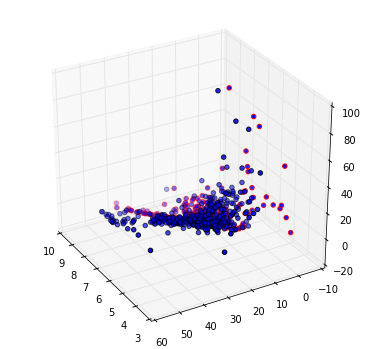

In [256]:
thetas
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')

predictions = predict(thetas, housing[["rooms", "crime"]])
ax.scatter(housing["rooms"], predictions, housing["crime"], color="r")
ax.scatter(housing["rooms"], housing["value"], housing["crime"])
ax.view_init(elev=30., azim=150)
# ax.thetas[1]*housing["rooms"] + thetas[0])

### Let's compare against the real model

In [261]:
multi_lr = LinearRegression()
multi_lr.fit(housing[["rooms", "crime"]], housing["value"])
print("sklearn learned (intercept, slope): ", multi_lr.intercept_, multi_lr.coef_)
print("we learned (intercept, slope): ", thetas[0], thetas[1:])

sklearn learned (intercept, slope):  -29.2447194519 [ 8.39106825 -0.26491325]
we learned (intercept, slope):  -29.2443150211 [ 8.39100539 -0.2649146 ]


DAAAANG looks good!  
Let's sum up what we've got now into a sweet lil object. We can mock out the interface using an abstract base class. These are good for when you're creating a framework with little interchangable pieces that will all have the same interface (similar to java's interface class)

### Early stopping
Hey did you see? Our algorithm went on for way longer than it needed to. Let's add a check to see if our algorithm has converged, this way, we can stop computing gradients when our model is done improving.

## TODO LATER

### Multiple starts to prevent local maxima
### Feature Scaling
## TODO Later

## Full implementation
And there you have it, a working implementation of linear regression in < 25 lines of python

In [297]:
class SimpleLinearRegression():
    def __init__(self, alpha=.01, max_iter=10000):
        self._alpha = alpha
        self._max_iter = max_iter
        self._thetas = None
        
    def fit(self, xx: np.matrix, yy: np.array) -> None:
        n_columns = xx.shape[1]
        thetas_init = np.random.rand(n_columns + 1)
        self._thetas = self._gradient_descent(thetas_init, xx, yy, self._max_iter)
    
    def predict(self, xs: np.matrix) -> np.array:  
        return self._thetas[0] + np.dot(xs, self._thetas[1:])

    def _gradient_descent(self, thetas, xs: np.matrix, ys: np.array, max_iter: int) -> np.array:
        thetas_progress = np.copy(thetas)
        for ii in range(max_iter):
            if ii % 500 == 0:
                print(thetas_progress, loss(predict(thetas_progress, xs), ys))
            thetas_progress -= self._alpha * compute_gradient(thetas_progress, xs, ys)
        return thetas_progress
    
def compute_gradient(thetas: np.array, xs: np.matrix, ys: np.array) -> np.array:
    predictions = predict(thetas, xs)
    error = subtract(predictions, ys)
    grad0 = mean(error)
    n_rows = xs.shape[0]
    other_grads = np.dot(error.T, xs) / n_rows
    return np.append([grad0], other_grads)

You can use it like this:

In [298]:
srl = SimpleLinearRegression(.01, 50000)
srl.fit(housing[["rooms", "crime"]], housing["value"])
my_predictions = srl.predict(housing[["rooms", "crime"]])

multi_lr = LinearRegression()
multi_lr.fit(housing[["rooms", "crime"]], housing["value"])
sklearn_preditions = multi_lr.predict(housing[["rooms", "crime"]])

list(zip(my_predictions, sklearn_preditions))[:10]

[ 0.2030155   0.70378551  0.01488675] 397.980967172
[-0.95651719  3.99453994 -0.35917868] 47.8516394279
[-2.49800982  4.23411741 -0.35404192] 46.8779899922
[-3.95550278  4.46063972 -0.34918509] 46.0075624085
[-5.33357342  4.67481829 -0.34459291] 45.229413569
[-6.63654966  4.87732575 -0.34025097] 44.533760504
[-7.86852357  5.06879808 -0.33614564] 43.9118573896
[-9.03336423  5.24983663 -0.33226401] 43.3558855939
[-10.13472991   5.42100994  -0.32859391] 42.8588553806
[-11.17607951   5.58285561  -0.32512379] 42.4145180331
[-12.16068344   5.73588192  -0.32184278] 42.0172872953
[-13.09163392   5.88056945  -0.31874055] 41.6621691402
[-13.97185466   6.0173726   -0.31580737] 41.3446989848
[-14.80411004   6.14672103  -0.31303402] 41.0608855607
[-15.59101381   6.26902094  -0.31041181] 40.8071607354
[-16.33503728   6.38465644  -0.30793248] 40.5803346535
[-17.03851712   6.49399067  -0.30558826] 40.3775556335
[-17.70366264   6.59736702  -0.30337178] 40.1962743162
[-18.33256276   6.69511014  -0.30127

[(25.922464973871403, 25.924880016481229),
 (24.627311390086728, 24.627094977402113),
 (31.024999821167103, 31.037876415925485),
 (29.457727137051396, 29.467400894533103),
 (30.695712329323936, 30.707953045213504),
 (24.702002954259651, 24.701941711963091),
 (21.186196879313488, 21.178993654593416),
 (22.511101114339841, 22.506660554536051),
 (17.963112986201732, 17.949425568539663),
 (21.097518736342959, 21.090208450379119)]

OK, now let's think about the interface we want. Let's make a little object that can take an arbitrary matrix of data, and an array of answers and create a linear prediction model.
We want an object that supports two functions, `fit` and `predict`, let's stub it out

## Logistic Regression

OK, Let's change things up now and instead of trying to predict a continuous value, we're going to predict whether we think something is likely to be true or not.

Let's see if we can predict **how likely** a house is to have a value over 20,000 based on the number of rooms and per capita crime rate in the town.

In [313]:
classy_housing = housing[["rooms", "crime"]]
value_over_20 = housing["value"].apply(lambda x: 1 if x > 20 else 0)
value_over_20.value_counts() # Seems like a reasonable distribution

1    291
0    215
Name: value, dtype: int64

So we have to do the same thing. We want to:
* create a sigmoid function
* squish the output of our matrix dot product with the sigmoid. The gradient descent will look exactly the same :D

In [371]:
def sigmoid(x: np.array) -> np.array:
    return 1 / (1 + np.exp(-x))

In [312]:
def predict_classification(thetas: np.array, xs: np.matrix) -> np.array:
    return sigmoid(thetas[0] + np.dot(xs, thetas[1:]))

In [350]:
# TODO: this doesn't work properly when you predict 1 or 0. Write a test and fix it
def loss_classification(predictions: np.array, actual: np.array) -> float:
    positives = -np.multiply(actual, np.log(predictions))
    negatives = -np.multiply((1 - actual), np.log(1 - predictions))
    return positives + negatives
loss_classification(np.array([.5, .5, 0]), np.array([1, 0, 0]))
loss_classification(np.array([.5, .5, .2]), np.array([1, 0, 0]))

array([ 0.69314718,  0.69314718,  0.22314355])

### Let's try making a new theta

In [404]:
def gradient_descent(thetas: np.array, xs: np.matrix, ys: np.array, alpha=.01, max_iter: int=50000) -> np.array:
    thetas_progress = np.copy(thetas)
    for ii in range(max_iter):
        thetas_progress -= alpha * compute_gradient(thetas_progress, xs, ys)
    return thetas_progress

def compute_gradient(thetas: np.array, xs: np.matrix, ys: np.array) -> np.array:
    predictions = predict_classification(thetas, xs) # THE DIFFERENCE BETWEEN LINEAR AND LOGISTIC REGRESSION IS THIS ONE LINE
    error = subtract(predictions, ys)
    grad0 = mean(error)
    n_rows = xs.shape[0]
    other_grads = np.dot(error.T, xs) / n_rows
    return np.append([grad0], other_grads)

In [414]:
classy_thetas = np.random.rand(classy_housing.shape[1] + 1)
descended = gradient_descent(classy_thetas, classy_housing, value_over_20, alpha=.005)

## Let's check our work against the real deal

In [415]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(classy_housing, value_over_20)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [428]:
from IPython.display import display
display(descended)
(logr.intercept_, logr.coef_)

array([-2.93655561,  0.62725345, -0.26175767])

(array([-4.16558645]), array([[ 0.82160807, -0.25790916]]))

In [373]:
descended

array([-1.00609809,  0.32429688, -0.27047158])

In [146]:
thetas[0]

0.94396713733418403

In [135]:
housing["rooms"].shape

(506,)

Cool Cool, this seems to be working. What if we want to do multiclass regression?

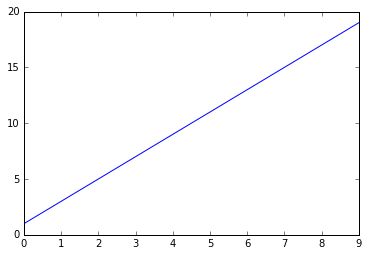

In [106]:
def plot_line(intercept: float, slope: float):
    plt.plot(np.arange(10), slope*np.arange(10) + intercept)
    plt.show()
    
import matplotlib.animation as animation

plot_line(1, 2)

Populating the interactive namespace from numpy and matplotlib


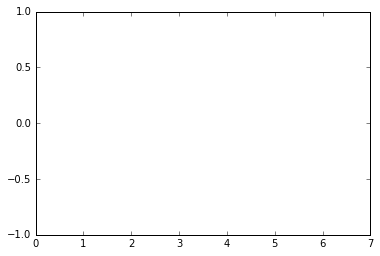

RuntimeError: No MovieWriters available!

In [114]:
from IPython.display import HTML
%pylab inline
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()
ani.to_html5_video()